In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [4]:
sigm = lambda x: 1/(1+np.exp(-x))
tan = lambda x: np.tanh(x)

In [5]:
class Layer:
    
    def __init__(self, NC, NN, ActFunc, rate = 0.05):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFunc
        self.rate = rate
        
        self.W = np.random.uniform( -10.,10., size=(self.NC,self.NN) )
        self.b = np.random.uniform( -10.,10., size=(1,self.NN) )
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc(z)[0] # Esto es por la geometria
    
    def Mutate(self):
        self.W += np.random.normal( loc=0.,scale=self.rate,size=(self.NC,self.NN) )
        self.b += np.random.normal( loc=0.,scale=self.rate,size=(1,self.NN) )

In [7]:
l0 = Layer(2,5,tan)
l1 = Layer(5,3,sigm)
l2 = Layer(3,2,sigm)
l3 = Layer(2,2,sigm)
Layers = [l0,l1,l2,l3]

In [8]:
Layers # Red neuronal

In [9]:
def Brain(Layers,x):
    
    for i in range(len(Layers)):
        
        if i==0:
            output = Layers[i].Activation(x)
        else:
            output = Layers[i].Activation(output)
        
    return output

In [10]:
Brain(Layers,[1,1.2])

array([0.21319904, 0.01321593])

In [54]:
x = np.linspace(-1,1,10)
y = x.copy()

X,Y = np.meshgrid(x,y)

N1 = np.zeros_like(X)
N2 = np.zeros_like(X)

for i, _x in enumerate(x):
    for j, _y in enumerate(y):
        N1[i,j] = Brain(Layers,[_x,_y])[0]
        N2[i,j] = Brain(Layers,[_x,_y])[1]

<IPython.core.display.Javascript object>


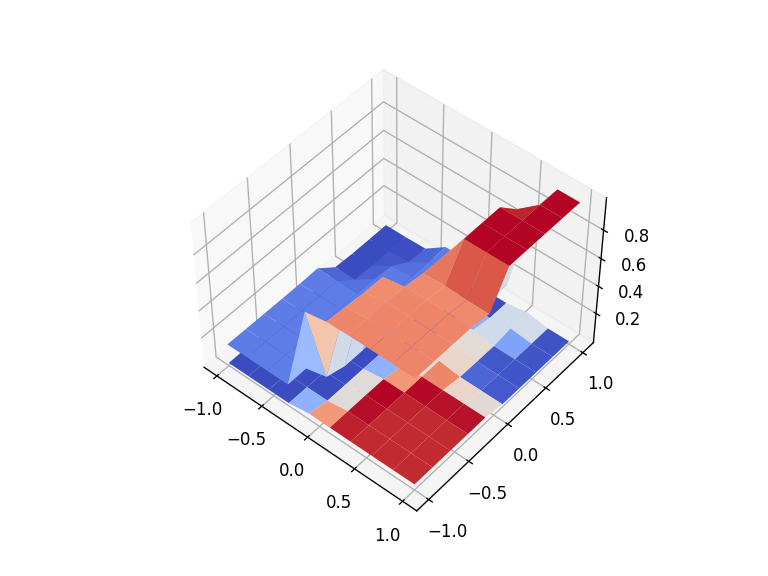

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,N1,cmap='coolwarm')
ax.plot_surface(X,Y,N2,cmap='coolwarm')

In [58]:
Layers[0].W

array([[-2.41840498,  7.54423765,  4.47407271,  3.53342128,  3.55354916],
       [ 9.60414933,  0.51120446,  6.98982059, -9.72715264,  3.17607586]])

In [59]:
Layers[0].b

array([[ 6.23621651, -0.73815414, -9.29948219,  1.85000255,  9.14501788]])